<a href="https://colab.research.google.com/github/lumimevi/Python_repository/blob/master/Testes_de_Hip%C3%B3tese.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Testes de Hipótese**

Lourdes Milagros Mendoza Villavicencio

# Questão Nº1

Um fabricante de aspirina enche os frascos por peso em vez de fazê-lo por quantidade. Uma vez que cada frasco deve conter 100 comprimidos, o peso médio por unidade deve ser de 5 grains. Cada um dos 100 comprimidos retirados de um lote bastante grande é pesado, resultando em um peso médio amostral por comprimido de 4,87 grains e um desvio padrão da amostra de 35 grains. Essas informações fornecem forte evidência para concluir que a empresa não está enchendo seus vidros conforme anunciado? Teste as hipóteses apropriadas, usando α = 0,01, calculando primeiro o valor-p e depois comparando-o com o nível de significância especificado.



**Peso dos Comprimidos de Aspirina (Teste de Hipóteses para Média)**


In [1]:
import numpy as np
from scipy import stats

print("--- 1. Peso dos Comprimidos de Aspirina ---")

# Dados fornecidos
media_populacional_anunciada = 5.0 # grãos (H0: mu = 5.0)
n_amostra = 100
media_amostral = 4.87 # grãos
desvio_padrao_amostral = 0.35 # grãos
alpha = 0.01 # Nível de significância

# Hipóteses:
# H0: A empresa está enchendo os vidros conforme anunciado (peso médio = 5 grains) (mu = 5.0)
# Ha: A empresa NÃO está enchendo os vidros conforme anunciado (peso médio != 5 grains) (mu != 5.0)
# Este é um teste bicaudal.

# Calcular a estatística de teste t
# t = (média_amostral - média_populacional_anunciada) / (desvio_padrao_amostral / sqrt(n))
t_statistic = (media_amostral - media_populacional_anunciada) / (desvio_padrao_amostral / np.sqrt(n_amostra))

# Graus de liberdade
df = n_amostra - 1

# Calcular o valor-p para um teste bicaudal
# p_value = 2 * P(T > |t_statistic|)
p_value = 2 * (1 - stats.t.cdf(abs(t_statistic), df))

print(f"\nDetalhes do Teste:")
print(f"  Média populacional anunciada (mu_0): {media_populacional_anunciada} grãos")
print(f"  Média amostral (x̄): {media_amostral} grãos")
print(f"  Desvio padrão amostral (s): {desvio_padrao_amostral} grãos")
print(f"  Tamanho da amostra (n): {n_amostra}")
print(f"  Nível de significância (α): {alpha}")
print(f"  Estatística de teste t: {t_statistic:.4f}")
print(f"  Graus de liberdade (df): {df}")
print(f"  Valor-p: {p_value:.4f}")

# Comparar o valor-p com o nível de significância
print("\nConclusão:")
if p_value < alpha:
    print(f"  Como o valor-p ({p_value:.4f}) é menor que α ({alpha}), rejeitamos a hipótese nula (H0).")
    print(f"  Há forte evidência para concluir que a empresa NÃO está enchendo seus vidros conforme anunciado.")
else:
    print(f"  Como o valor-p ({p_value:.4f}) é maior ou igual a α ({alpha}), não há evidência suficiente para rejeitar a hipótese nula (H0).")
    print(f"  Não há forte evidência para concluir que a empresa não está enchendo seus vidros conforme anunciado.")

--- 1. Peso dos Comprimidos de Aspirina ---

Detalhes do Teste:
  Média populacional anunciada (mu_0): 5.0 grãos
  Média amostral (x̄): 4.87 grãos
  Desvio padrão amostral (s): 0.35 grãos
  Tamanho da amostra (n): 100
  Nível de significância (α): 0.01
  Estatística de teste t: -3.7143
  Graus de liberdade (df): 99
  Valor-p: 0.0003

Conclusão:
  Como o valor-p (0.0003) é menor que α (0.01), rejeitamos a hipótese nula (H0).
  Há forte evidência para concluir que a empresa NÃO está enchendo seus vidros conforme anunciado.


# Questão Nº2

Num estudo comparativo do tempo médio de adaptação, uma amostra aleatória, de 50
homens e 50 mulheres de um grande complexo industrial, produziu os seguintes resultados:

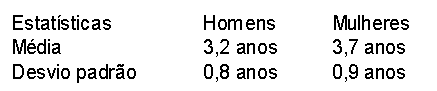

Que conclusões você poderia tirar para a população de homens e mulheres dessa indústria? (Indique as suposições feitas para resolver o problema.)


**Tempo Médio de Adaptação (Teste de Hipóteses para Diferença de Médias)**

In [2]:
import numpy as np
from scipy import stats

print("\n--- 2. Tempo Médio de Adaptação ---")

# Dados fornecidos para homens
n_homens = 50
media_homens = 3.2 # anos
dp_homens = 0.8 # anos

# Dados fornecidos para mulheres
n_mulheres = 50
media_mulheres = 3.7 # anos
dp_mulheres = 0.9 # anos

# Nível de significância (não especificado, comumente usa-se 0.05)
alpha = 0.05

# Hipóteses:
# H0: Não há diferença no tempo médio de adaptação entre homens e mulheres (mu_homens - mu_mulheres = 0)
# Ha: Há diferença no tempo médio de adaptação entre homens e mulheres (mu_homens - mu_mulheres != 0)
# Este é um teste bicaudal.

# Assunções:
print("\nAssunções para resolver o problema:")
print("1. As amostras de homens e mulheres são aleatórias e independentes.")
print("2. Os tamanhos das amostras são grandes (n_homens = 50, n_mulheres = 50), o que nos permite usar o Teorema do Limite Central, mesmo que as distribuições populacionais não sejam normais. Podemos, portanto, usar a distribuição Z para o teste de hipóteses.")
print("3. As variâncias populacionais são desconhecidas, mas como as amostras são grandes, podemos usar as variâncias amostrais como boas estimativas das variâncias populacionais.")

# Calcular a diferença das médias amostrais
diff_medias = media_homens - media_mulheres

# Calcular o erro padrão da diferença de médias
# SE = sqrt((s1^2 / n1) + (s2^2 / n2))
se_diff_means = np.sqrt((dp_homens**2 / n_homens) + (dp_mulheres**2 / n_mulheres))

# Calcular a estatística de teste Z
# Z = (diff_medias - 0) / SE
z_statistic = diff_medias / se_diff_means

# Calcular o valor-p para um teste bicaudal
# p_value = 2 * P(Z > |z_statistic|)
p_value = 2 * (1 - stats.norm.cdf(abs(z_statistic)))

print(f"\nDetalhes do Teste:")
print(f"  Média homens (x̄_H): {media_homens} anos, DP homens (s_H): {dp_homens} anos, n_H: {n_homens}")
print(f"  Média mulheres (x̄_M): {media_mulheres} anos, DP mulheres (s_M): {dp_mulheres} anos, n_M: {n_mulheres}")
print(f"  Diferença de médias amostrais (x̄_H - x̄_M): {diff_medias:.4f}")
print(f"  Erro padrão da diferença: {se_diff_means:.4f}")
print(f"  Estatística de teste Z: {z_statistic:.4f}")
print(f"  Valor-p: {p_value:.4f}")
print(f"  Nível de significância (α): {alpha}")

# Conclusão
print("\nConclusão:")
if p_value < alpha:
    print(f"  Como o valor-p ({p_value:.4f}) é menor que α ({alpha}), rejeitamos a hipótese nula (H0).")
    print(f"  Há evidência estatística para concluir que existe uma diferença significativa no tempo médio de adaptação entre homens e mulheres nesta indústria.")
else:
    print(f"  Como o valor-p ({p_value:.4f}) é maior ou igual a α ({alpha}), não há evidência suficiente para rejeitar a hipótese nula (H0).")
    print(f"  Não há evidência estatística para concluir que existe uma diferença significativa no tempo médio de adaptação entre homens e mulheres nesta indústria.")


--- 2. Tempo Médio de Adaptação ---

Assunções para resolver o problema:
1. As amostras de homens e mulheres são aleatórias e independentes.
2. Os tamanhos das amostras são grandes (n_homens = 50, n_mulheres = 50), o que nos permite usar o Teorema do Limite Central, mesmo que as distribuições populacionais não sejam normais. Podemos, portanto, usar a distribuição Z para o teste de hipóteses.
3. As variâncias populacionais são desconhecidas, mas como as amostras são grandes, podemos usar as variâncias amostrais como boas estimativas das variâncias populacionais.

Detalhes do Teste:
  Média homens (x̄_H): 3.2 anos, DP homens (s_H): 0.8 anos, n_H: 50
  Média mulheres (x̄_M): 3.7 anos, DP mulheres (s_M): 0.9 anos, n_M: 50
  Diferença de médias amostrais (x̄_H - x̄_M): -0.5000
  Erro padrão da diferença: 0.1703
  Estatística de teste Z: -2.9361
  Valor-p: 0.0033
  Nível de significância (α): 0.05

Conclusão:
  Como o valor-p (0.0033) é menor que α (0.05), rejeitamos a hipótese nula (H0).
 

# Questão Nº3

Uma das maneiras de medir o grau de satisfação dos empregados de uma mesma categoria quanto à política salarial é por meio do desvio padrão de seus salários. A fábrica A diz ser mais coerente na política salarial do que a fábrica B. Para verificar essa afirmação, sorteou-se uma amostra de 10 funcionários não especializados de A, e 15 de B, obtendo-se os desvios padrões s_A = 1.000 reais e s_B = 1.600 reais. Qual seria a sua conclusão?

**Variabilidade Salarial entre Fábricas (Teste de Hipóteses para Razão de Variâncias)**

In [3]:
from scipy import stats

print("\n--- 3. Variabilidade Salarial entre Fábricas ---")

# Dados fornecidos
n_A = 10 # Tamanho da amostra da Fábrica A
s_A = 1000 # Desvio padrão amostral da Fábrica A

n_B = 15 # Tamanho da amostra da Fábrica B
s_B = 1600 # Desvio padrão amostral da Fábrica B

# Nível de significância (não especificado, comumente usa-se 0.05)
alpha = 0.05

# Hipóteses:
# Fábrica A diz ser mais coerente (menor variabilidade) que Fábrica B.
# Isso significa que a variância da Fábrica A (sigma_A^2) é menor que a variância da Fábrica B (sigma_B^2).
# H0: sigma_A^2 = sigma_B^2 (ou sigma_B^2 / sigma_A^2 = 1)
# Ha: sigma_A^2 < sigma_B^2 (ou sigma_B^2 / sigma_A^2 > 1)
# Este é um teste unicaudal (para a direita, se a razão for s_B^2 / s_A^2).

# Para o teste F, a estatística é a razão das variâncias amostrais (sempre a maior dividida pela menor para facilitar a tabela,
# mas para teste unicaudal, siga a hipótese).
# Se Ha for sigma_A^2 < sigma_B^2, então esperamos s_A^2 < s_B^2.
# A estatística F será F = s_B^2 / s_A^2

F_statistic = (s_B**2) / (s_A**2)

# Graus de liberdade
df1 = n_B - 1 # Graus de liberdade do numerador (associado à maior variância amostral, s_B)
df2 = n_A - 1 # Graus de liberdade do denominador (associado à menor variância amostral, s_A)

# Calcular o valor-p
# Para um teste unicaudal à direita: P(F > F_statistic)
p_value = 1 - stats.f.cdf(F_statistic, df1, df2)

print(f"\nDetalhes do Teste F:")
print(f"  Fábrica A: n={n_A}, s={s_A} reais, s²={s_A**2} reais²")
print(f"  Fábrica B: n={n_B}, s={s_B} reais, s²={s_B**2} reais²")
print(f"  Estatística de teste F (s_B²/s_A²): {F_statistic:.4f}")
print(f"  Graus de liberdade (df1, df2): ({df1}, {df2})")
print(f"  Valor-p: {p_value:.4f}")
print(f"  Nível de significância (α): {alpha}")

# Conclusão
print("\nConclusão:")
if p_value < alpha:
    print(f"  Como o valor-p ({p_value:.4f}) é menor que α ({alpha}), rejeitamos a hipótese nula (H0).")
    print(f"  Há evidência estatística para concluir que a variabilidade salarial da Fábrica A é menor que a da Fábrica B (ou seja, a Fábrica A é mais coerente na política salarial do que a Fábrica B).")
else:
    print(f"  Como o valor-p ({p_value:.4f}) é maior ou igual a α ({alpha}), não há evidência suficiente para rejeitar a hipótese nula (H0).")
    print(f"  Não há evidência estatística para concluir que a Fábrica A é mais coerente na política salarial do que a Fábrica B com base nestes dados.")


--- 3. Variabilidade Salarial entre Fábricas ---

Detalhes do Teste F:
  Fábrica A: n=10, s=1000 reais, s²=1000000 reais²
  Fábrica B: n=15, s=1600 reais, s²=2560000 reais²
  Estatística de teste F (s_B²/s_A²): 2.5600
  Graus de liberdade (df1, df2): (14, 9)
  Valor-p: 0.0799
  Nível de significância (α): 0.05

Conclusão:
  Como o valor-p (0.0799) é maior ou igual a α (0.05), não há evidência suficiente para rejeitar a hipótese nula (H0).
  Não há evidência estatística para concluir que a Fábrica A é mais coerente na política salarial do que a Fábrica B com base nestes dados.


# Questão Nº4

A biblioteca de uma universidade rotineiramente faz o inventário completo das prateleiras uma vez por ano. Devido às novas regras de armazenamento nas prateleiras instituídas no ano anterior, o bibliotecário-chefe acredita ser possível economizar recursos adiando o inventário. Ele decide selecionar aleatoriamente 1000 livros da coleção da biblioteca para serem procurados de maneira preliminar. Se a evidência indicar fortemente que a proporção real de livros mal arquivados nas prateleiras ou que não podem ser localizados for menor que 0,02, então, o inventário será adiado.

a. Dentre os 1000 livros procurados, 15 estavam mal arquivados ou não foram localizados. Teste as hipóteses relevantes e aconselhe o bibliotecário sobre o que fazer (use α = 0,05).

b. Se a proporção real de livros mal arquivados ou perdidos nas prateleiras for realmente 0,01, qual é a probabilidade de o inventário ser (desnecessariamente) feito?

c. Se a proporção real for 0,05, qual é a probabilidade de o inventário ser adiado?


**Livros Mal Arquivados na Biblioteca (Teste de Hipóteses para Proporção e Probabilidade de Erros Tipo I e II)**

In [4]:
import numpy as np
from scipy import stats

print("\n--- 4. Livros Mal Arquivados na Biblioteca ---")

# Dados iniciais
n_amostra = 1000 # livros
alpha = 0.05 # Nível de significância
p0 = 0.02 # Proporção limite para adiar o inventário (hipótese nula)

# (a) Dentre os 1000 livros procurados, 15 estavam mal arquivados ou não foram localizados. Teste as hipóteses relevantes e aconselhe o bibliotecário sobre o que fazer (use α = 0,05).
x_sucessos = 15 # livros mal arquivados/perdidos
p_hat = x_sucessos / n_amostra # Proporção amostral

# Hipóteses:
# H0: A proporção real de livros mal arquivados/perdidos é >= 0.02 (p >= 0.02)
# Ha: A proporção real de livros mal arquivados/perdidos é < 0.02 (p < 0.02)
# Este é um teste unicaudal (para a esquerda).

# Calcular a estatística de teste Z para proporção
# Z = (p_hat - p0) / sqrt(p0 * (1 - p0) / n)
se_p_hat = np.sqrt(p0 * (1 - p0) / n_amostra)
z_statistic_a = (p_hat - p0) / se_p_hat

# Calcular o valor-p para um teste unicaudal à esquerda
# p_value = P(Z < z_statistic)
p_value_a = stats.norm.cdf(z_statistic_a)

print(f"\n(a) Teste de Hipóteses para Proporção:")
print(f"  Proporção limite (p0): {p0}")
print(f"  Proporção amostral (p̂): {p_hat:.4f}")
print(f"  Tamanho da amostra (n): {n_amostra}")
print(f"  Nível de significância (α): {alpha}")
print(f"  Estatística de teste Z: {z_statistic_a:.4f}")
print(f"  Valor-p: {p_value_a:.4f}")

print("\nConclusão para (a):")
if p_value_a < alpha:
    print(f"  Como o valor-p ({p_value_a:.4f}) é menor que α ({alpha}), rejeitamos a hipótese nula (H0).")
    print(f"  Isso significa que há forte evidência de que a proporção real de livros mal arquivados/perdidos é menor que 0.02.")
    print(f"  **Aconselhamento ao bibliotecário: O inventário pode ser adiado.**")
else:
    print(f"  Como o valor-p ({p_value_a:.4f}) é maior ou igual a α ({alpha}), não há evidência suficiente para rejeitar a hipótese nula (H0).")
    print(f"  Não há forte evidência de que a proporção real de livros mal arquivados/perdidos seja menor que 0.02.")
    print(f"  **Aconselhamento ao bibliotecário: O inventário NÃO deve ser adiado.**")


# (b) Se a proporção real de livros mal arquivados ou perdidos nas prateleiras for realmente 0,01, qual é a probabilidade de o inventário ser (desnecessariamente) feito?
# O inventário é feito se a H0 NÃO for rejeitada quando ela é realmente falsa (erro Tipo II), OU se a Ha NÃO for aceita quando ela é realmente verdadeira.
# No contexto do problema, o inventário é feito se a evidência NÃO indicar fortemente que p < 0.02.
# Ou seja, se o valor de p_hat for tal que Z_statistic >= Z_critico.
# Neste caso, Ha: p < 0.02. A região crítica é Z < -Z_alpha.
# Z_critico para α = 0.05 (teste unicaudal à esquerda)
z_critical_b = stats.norm.ppf(alpha) # Para teste unicaudal à esquerda, Z_alpha

# Se p_real = 0.01, queremos a probabilidade de p_hat levar a NÃO REJEITAR H0.
# Isso significa P(Z_test_statistic >= Z_critical | p_real = 0.01)
# O erro Tipo II (beta) é P(não rejeitar H0 | H0 é falsa).
# A H0 é p >= 0.02. Se p_real = 0.01, H0 é falsa.
# A região de aceitação de H0 (não rejeição de H0) é quando Z_test_statistic >= z_critical_b.
# Queremos encontrar P(p_hat >= p_critico | p_real = 0.01)

# Primeiro, encontre o valor crítico de p_hat que corresponde a z_critical_b
# z_critical_b = (p_critico - p0) / se_p_hat_for_p0
# p_critico = p0 + z_critical_b * se_p_hat_for_p0
p_critical_threshold = p0 + z_critical_b * se_p_hat # Usando se_p_hat baseado em p0

# Agora, calcule a probabilidade de p_hat ser maior ou igual a p_critical_threshold,
# DADA a proporção real p_real = 0.01. Para isso, recalcule o erro padrão com p_real.
se_p_hat_real = np.sqrt(0.01 * (1 - 0.01) / n_amostra)
z_for_p_critical_given_real = (p_critical_threshold - 0.01) / se_p_hat_real

# Probabilidade de o inventário ser feito = P(Z >= z_for_p_critical_given_real | p_real = 0.01)
prob_inventario_feito = 1 - stats.norm.cdf(z_for_p_critical_given_real)

print(f"\n(b) Probabilidade de o inventário ser (desnecessariamente) feito (quando p_real = 0.01):")
print(f"  Z-crítico para α=0.05 (unicaudal esq.): {z_critical_b:.4f}")
print(f"  Limiar crítico de p̂ para rejeitar H0: {p_critical_threshold:.4f}")
print(f"  Erro padrão de p̂ sob p_real=0.01: {se_p_hat_real:.4f}")
print(f"  Z-score do limiar crítico sob p_real=0.01: {z_for_p_critical_given_real:.4f}")
print(f"  Probabilidade de o inventário ser feito (Erro Tipo II): {prob_inventario_feito:.4f}")


# (c) Se a proporção real for 0,05, qual é a probabilidade de o inventário ser adiado?
# O inventário é adiado se a H0 for rejeitada (Z_statistic < z_critical_b).
# Queremos P(Z_statistic < z_critical_b | p_real = 0.05)
# Isso é P(p_hat < p_critical_threshold | p_real = 0.05)

# Usar p_critical_threshold calculado anteriormente.
# Recalcular o erro padrão com p_real = 0.05.
se_p_hat_real_c = np.sqrt(0.05 * (1 - 0.05) / n_amostra)
z_for_p_critical_given_real_c = (p_critical_threshold - 0.05) / se_p_hat_real_c

# Probabilidade de o inventário ser adiado = P(Z < z_for_p_critical_given_real_c | p_real = 0.05)
prob_inventario_adiado = stats.norm.cdf(z_for_p_critical_given_real_c)

print(f"\n(c) Probabilidade de o inventário ser adiado (quando p_real = 0.05):")
print(f"  Erro padrão de p̂ sob p_real=0.05: {se_p_hat_real_c:.4f}")
print(f"  Z-score do limiar crítico sob p_real=0.05: {z_for_p_critical_given_real_c:.4f}")
print(f"  Probabilidade de o inventário ser adiado: {prob_inventario_adiado:.4f}")


--- 4. Livros Mal Arquivados na Biblioteca ---

(a) Teste de Hipóteses para Proporção:
  Proporção limite (p0): 0.02
  Proporção amostral (p̂): 0.0150
  Tamanho da amostra (n): 1000
  Nível de significância (α): 0.05
  Estatística de teste Z: -1.1294
  Valor-p: 0.1294

Conclusão para (a):
  Como o valor-p (0.1294) é maior ou igual a α (0.05), não há evidência suficiente para rejeitar a hipótese nula (H0).
  Não há forte evidência de que a proporção real de livros mal arquivados/perdidos seja menor que 0.02.
  **Aconselhamento ao bibliotecário: O inventário NÃO deve ser adiado.**

(b) Probabilidade de o inventário ser (desnecessariamente) feito (quando p_real = 0.01):
  Z-crítico para α=0.05 (unicaudal esq.): -1.6449
  Limiar crítico de p̂ para rejeitar H0: 0.0127
  Erro padrão de p̂ sob p_real=0.01: 0.0031
  Z-score do limiar crítico sob p_real=0.01: 0.8638
  Probabilidade de o inventário ser feito (Erro Tipo II): 0.1938

(c) Probabilidade de o inventário ser adiado (quando p_real = 0

# Questão Nº5

Os novos operários de uma empresa são treinados a operar uma máquina, cujo tempo X (em horas) de aprendizado é anotado. Observou-se que X segue de perto a distribuição N(25, 100). Uma nova técnica de ensino, que deve melhorar o tempo de aprendizado, foi testada em 16 novos empregados, os quais apresentaram 20,5 horas como tempo médio de aprendizado. Usando o valor-p, você diria que a nova técnica é melhor que a anterior?

**Tempo de Aprendizado de Operários (Teste de Hipóteses para Média com Desvio Padrão Populacional Conhecido)**

In [5]:
import numpy as np
from scipy import stats

print("\n--- 5. Tempo de Aprendizado de Operários ---")

# Dados da distribuição anterior (população)
mu_0 = 25 # horas
sigma = np.sqrt(100) # Desvio padrão = sqrt(Variância) = sqrt(100) = 10 horas

# Dados da nova técnica de ensino (amostra)
n_nova_tecnica = 16
media_amostral_nova_tecnica = 20.5 # horas

# Nível de significância (não especificado, comumente usa-se 0.05 para valor-p)
alpha = 0.05 # Vamos usar um alpha padrão para a decisão.

# Hipóteses:
# H0: A nova técnica NÃO é melhor (tempo médio de aprendizado é >= 25 horas) (mu >= 25)
# Ha: A nova técnica É melhor (tempo médio de aprendizado é < 25 horas) (mu < 25)
# Este é um teste unicaudal (para a esquerda).

# Calcular a estatística de teste Z
# Z = (média_amostral - mu_0) / (sigma / sqrt(n))
z_statistic = (media_amostral_nova_tecnica - mu_0) / (sigma / np.sqrt(n_nova_tecnica))

# Calcular o valor-p para um teste unicaudal à esquerda
# p_value = P(Z < z_statistic)
p_value = stats.norm.cdf(z_statistic)

print(f"\nDetalhes do Teste:")
print(f"  Média populacional anterior (mu_0): {mu_0} horas")
print(f"  Desvio padrão populacional (σ): {sigma} horas")
print(f"  Média amostral da nova técnica (x̄): {media_amostral_nova_tecnica} horas")
print(f"  Tamanho da amostra (n): {n_nova_tecnica}")
print(f"  Estatística de teste Z: {z_statistic:.4f}")
print(f"  Valor-p: {p_value:.4f}")
print(f"  Nível de significância (α): {alpha}")

# Conclusão
print("\nConclusão:")
if p_value < alpha:
    print(f"  Como o valor-p ({p_value:.4f}) é menor que α ({alpha}), rejeitamos a hipótese nula (H0).")
    print(f"  Há evidência estatística para concluir que a nova técnica de ensino é melhor que a anterior, pois o tempo médio de aprendizado é significativamente menor que 25 horas.")
else:
    print(f"  Como o valor-p ({p_value:.4f}) é maior ou igual a α ({alpha}), não há evidência suficiente para rejeitar a hipótese nula (H0).")
    print(f"  Não há evidência estatística para concluir que a nova técnica de ensino é melhor que a anterior.")


--- 5. Tempo de Aprendizado de Operários ---

Detalhes do Teste:
  Média populacional anterior (mu_0): 25 horas
  Desvio padrão populacional (σ): 10.0 horas
  Média amostral da nova técnica (x̄): 20.5 horas
  Tamanho da amostra (n): 16
  Estatística de teste Z: -1.8000
  Valor-p: 0.0359
  Nível de significância (α): 0.05

Conclusão:
  Como o valor-p (0.0359) é menor que α (0.05), rejeitamos a hipótese nula (H0).
  Há evidência estatística para concluir que a nova técnica de ensino é melhor que a anterior, pois o tempo médio de aprendizado é significativamente menor que 25 horas.
